In [113]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import cPickle
import os
import matplotlib
os.chdir('/Users/zbutler/research/fire_prediction')
from data import data
import prediction.cluster_regression as cr
from prediction.cluster_regression import ClusterRegression
from metrics.evaluation import evaluate_glm, cross_validation_evaluation
%matplotlib inline

In [2]:
clust_feat_df = data.load_clust_feat_df(clust_thresh=5)

In [3]:
# Get metrics for zero padding
import metrics.evaluation as ev
reload(ev)
reload(cr)
mets_baseline = dict()
mets_mem = dict()
mets_temphum = dict()
mets_weather = dict()
mets = ("MSE", "RobustMSE", "MeanAbsErr")

cdf_with_stuff = cr.add_autoreg_and_n_det(clust_feat_df.copy(), autoreg_cols=1, t_k_max=6, zero_padding=True)
print list(cdf_with_stuff.iloc[0:10]["t_k_4"])
for t_k in range(5,-1,-1):
    y_t_k_base = cdf_with_stuff["t_k_%d" % t_k]
    y_hat_t_k_base = cdf_with_stuff["autoreg_1"]
    my_mets = []
    for met in mets:
        my_mets.append(evaluate_glm(y_t_k_base, y_hat_t_k_base, metric=met))
    mets_baseline[t_k] = my_mets
    
    mets_mem[t_k] = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=[], zero_padding=True, return_arrs=False)
    mets_temphum[t_k] = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=["temp","humidity"], zero_padding=True, return_arrs=False)
    mets_weather[t_k] = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=["temp","humidity","wind","rain_del_2"], zero_padding=True, return_arrs=False)
    print "done with t_k %d" % t_k
print mets_mem

prediction/cluster_regression.py:43: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  clust_df = df[df.cluster==clust].sort('dayofyear')


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


metrics/evaluation.py:77: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.mean(sortedSEs[toss_outliers:-toss_outliers])


done with t_k 5
done with t_k 4
done with t_k 3
done with t_k 2
done with t_k 1
done with t_k 0
{0: [387.07644108389042, 146.15132261143088, 7.3510247845209795], 1: [497.96578055197858, 193.93063900596167, 8.9853841580370482], 2: [531.52245436703731, 195.06602390171702, 9.2589588550489328], 3: [526.62030825177203, 178.90141239052812, 8.9705203381173177], 4: [497.14077447731944, 157.46545939191071, 8.4185302564056688], 5: [516.86522871847694, 139.89395866395213, 8.0827582955740294]}


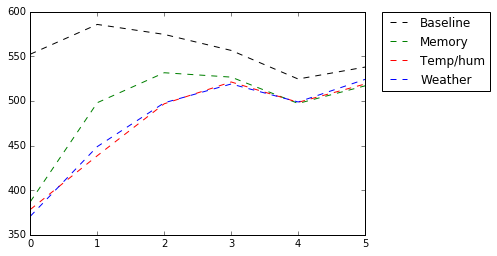

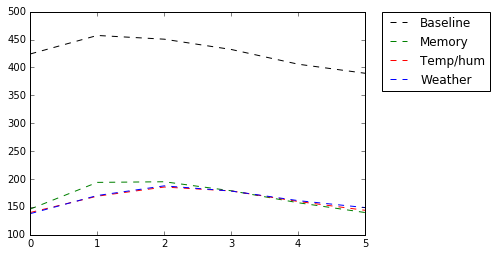

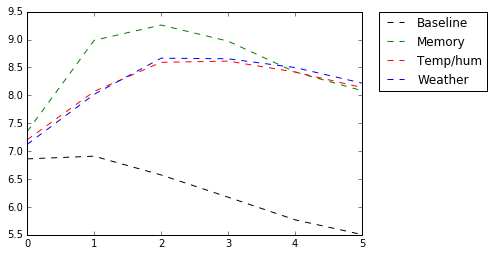

In [4]:
n_t_k = 6
t_k_arr = range(n_t_k)
for i,met in enumerate(mets):
    base_arr = np.array(map(lambda x: mets_baseline[x][i], t_k_arr))
    mem_arr = np.array(map(lambda x: mets_mem[x][i], t_k_arr))
    temphum_arr = np.array(map(lambda x: mets_temphum[x][i], t_k_arr))
    weather_arr = np.array(map(lambda x: mets_weather[x][i], t_k_arr))
    
    plt.plot(t_k_arr, base_arr, "k--", label="Baseline")
    plt.plot(t_k_arr, mem_arr, "g--", label="Memory")
    plt.plot(t_k_arr, temphum_arr, "r--", label="Temp/hum")
    plt.plot(t_k_arr, weather_arr, "b--", label="Weather")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig("pics/t_k_zero_padding_%s.png" % met)
    plt.show()
    plt.close()

In [18]:
# Get metrics for nan padding
import metrics.evaluation as ev
reload(ev)
reload(cr)
mets_baseline = dict()
mets_mem = dict()
mets_temphum = dict()
mets_weather = dict()
mets = ("MSE", "RobustMSE", "MeanAbsErr")
n_ex = []

print 'yolo'
#cdf_with_stuff = cr.add_autoreg_and_n_det(clust_feat_df.copy(), autoreg_cols=1, t_k_max=6, zero_padding=False)
print list(cdf_with_stuff.iloc[0:10]["t_k_4"])
for t_k in range(5,-1,-1):
    y_t_k_base = cdf_with_stuff["t_k_%d" % t_k]
    y_hat_t_k_base = cdf_with_stuff["autoreg_1"]
    my_mets = []
    for met in mets:
        my_mets.append(ev.evaluate_glm(y_t_k_base, y_hat_t_k_base, metric=met))
    mets_baseline[t_k] = my_mets
    
    mets_mem[t_k],y,y_hat = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=[], zero_padding=False, return_arrs=True)
    mets_temphum[t_k],y,y_hat = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=["temp","humidity"], zero_padding=False, return_arrs=True)
    mets_weather[t_k],y,y_hat = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=["temp","humidity","wind","rain_del_2"], zero_padding=False, return_arrs=True)
    
    n_ex.append(np.sum(~np.isnan(y_t_k_base)))
    print "done with t_k %d" % t_k

yolo
[nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
done with t_k 5
done with t_k 4
done with t_k 3
done with t_k 2
done with t_k 1
done with t_k 0


{0: [552.3066820701417, 424.11214904606459, 6.8608721487152255], 1: [647.3629635773576, 505.49105224742596, 7.565883591389653], 2: [671.6882089146387, 526.87284599708391, 7.5552742321548925], 3: [684.2309741413931, 531.40541949381236, 7.406925586932835], 4: [676.820126926084, 523.69770715813456, 7.206850303814152], 5: [727.3148611544734, 526.72750056881, 7.153605900283192]}


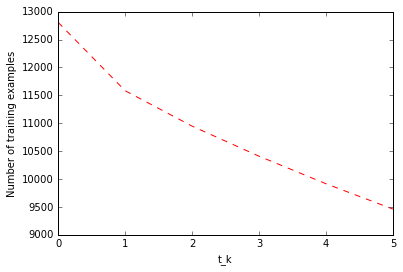

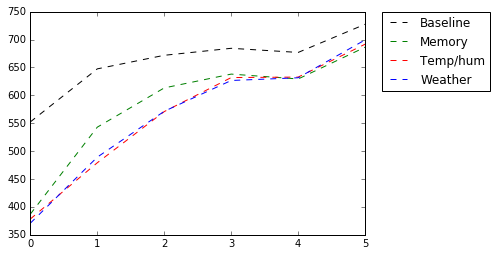

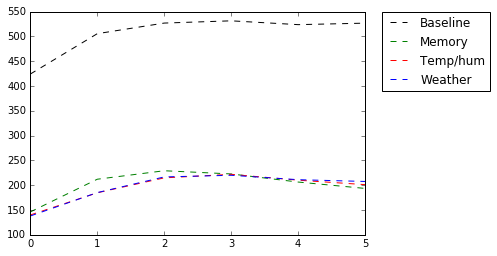

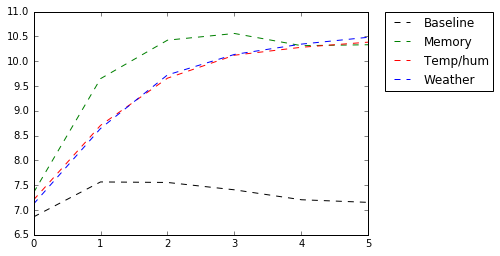

In [19]:
n_t_k = 6
t_k_arr = range(n_t_k)
print mets_baseline
plt.plot(t_k_arr, n_ex[::-1], 'r--')
plt.xlabel("t_k")
plt.ylabel("Number of training examples")
plt.show()
plt.close()

for i,met in enumerate(mets):
    base_arr = np.array(map(lambda x: mets_baseline[x][i], t_k_arr))
    mem_arr = np.array(map(lambda x: mets_mem[x][i], t_k_arr))
    temphum_arr = np.array(map(lambda x: mets_temphum[x][i], t_k_arr))
    weather_arr = np.array(map(lambda x: mets_weather[x][i], t_k_arr))
    
    plt.plot(t_k_arr, base_arr, "k--", label="Baseline")
    plt.plot(t_k_arr, mem_arr, "g--", label="Memory")
    plt.plot(t_k_arr, temphum_arr, "r--", label="Temp/hum")
    plt.plot(t_k_arr, weather_arr, "b--", label="Weather")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig("pics/t_k_zero_padding_%s.png" % met)
    plt.show()
    plt.close()

In [31]:
# Now do it again but don't be a moron
# Get metrics for zero padding
import metrics.evaluation as ev
reload(ev)
reload(cr)
mets_baseline = dict()
mets_mem = dict()
mets_temphum = dict()
mets_weather = dict()
mets = ("MSE", "RobustMSE", "MeanAbsErr")

cdf_with_stuff = cr.add_autoreg_and_n_det(clust_feat_df.copy(), autoreg_cols=10, t_k_max=0, zero_padding=False)
for t_k in range(5,-1,-1):
    y_t_k_base = cdf_with_stuff['n_det']
    y_hat_t_k_base = np.exp(cdf_with_stuff["autoreg_%d" % (1 + t_k)]) - 1
    my_mets = []
    for met in mets:
        my_mets.append(evaluate_glm(y_t_k_base, y_hat_t_k_base, metric=met))
    mets_baseline[t_k] = my_mets
    
    mets_mem[t_k] = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=[], zero_padding=True, return_arrs=False)
    mets_temphum[t_k] = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=["temp","humidity"], zero_padding=True, return_arrs=False)
    mets_weather[t_k] = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=["temp","humidity","wind","rain_del_2"], zero_padding=True, return_arrs=False)
    print "done with t_k %d" % t_k
print mets_mem

prediction/cluster_regression.py:42: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  clust_df = df[df.cluster==clust].sort('dayofyear')


done with t_k 5
done with t_k 4
done with t_k 3
done with t_k 2
done with t_k 1
done with t_k 0
{0: [387.07644108388325, 146.15132261142492, 7.3510247845209067], 1: [468.67699954778885, 183.88182725927115, 8.9088490745090407], 2: [514.94645817364949, 196.05087135456532, 9.707464833952228], 3: [527.31574578293157, 199.30532166675258, 9.9915827129981434], 4: [527.57656018836462, 196.82409307605059, 10.056098864984753], 5: [534.70661108784293, 196.87385907994434, 10.128682495369619]}


{0: [532.619594067135, 421.90594214229867, 7.353708040593286], 1: [667.3730679156909, 551.8308053166536, 8.897501951600312], 2: [742.6960967993755, 620.66528537920249, 9.626619828259173], 3: [769.5392661982826, 638.47130570758407, 9.884933645589383], 4: [759.0307572209211, 613.91970289288508, 9.798282591725215], 5: [728.0067915690867, 618.78694292415946, 9.789617486338798]}


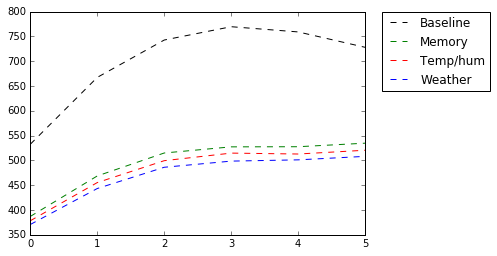

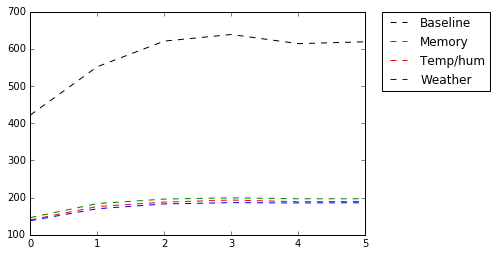

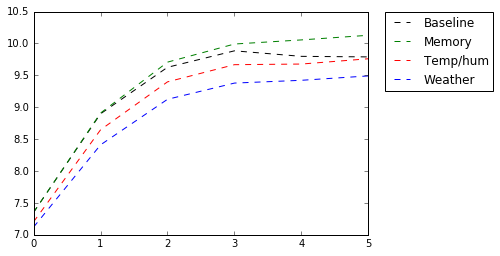

In [32]:
n_t_k = 6
t_k_arr = range(n_t_k)
print mets_baseline

for i,met in enumerate(mets):
    base_arr = np.array(map(lambda x: mets_baseline[x][i], t_k_arr))
    mem_arr = np.array(map(lambda x: mets_mem[x][i], t_k_arr))
    temphum_arr = np.array(map(lambda x: mets_temphum[x][i], t_k_arr))
    weather_arr = np.array(map(lambda x: mets_weather[x][i], t_k_arr))
    
    plt.plot(t_k_arr, base_arr, "k--", label="Baseline")
    plt.plot(t_k_arr, mem_arr, "g--", label="Memory")
    plt.plot(t_k_arr, temphum_arr, "r--", label="Temp/hum")
    plt.plot(t_k_arr, weather_arr, "b--", label="Weather")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig("pics/t_k_zero_padding_%s.png" % met)
    plt.show()
    plt.close()

In [56]:
def kill_nanners(df, weather_vars):
    for cov in weather_vars:
        nanners = df[np.isnan(df[cov])]
        for name in nanners.index:
            clust = nanners.loc[name].cluster
            dayofyear = nanners.loc[name].dayofyear
            next_offset_to_try = -1
            while 1:
                # If offset is getting too far away, just replace with mean across all time
                if abs(next_offset_to_try) > 5:
                    df.set_value(name, cov, np.mean(df[cov]))
                    break
                pot_val = df[(df.dayofyear==(dayofyear+next_offset_to_try)) & (df.cluster==clust)][cov]
                if not len(pot_val) or np.isnan(float(pot_val)):
                    if next_offset_to_try < 0:
                        next_offset_to_try = - next_offset_to_try
                    else:
                        next_offset_to_try = - (next_offset_to_try + 1)
                else:
                    df.set_value(name, cov, float(pot_val))
                    break
    return df

In [76]:
# Now do it again but don't be a moron
# Get metrics for zero padding
import metrics.evaluation as ev
reload(ev)
reload(cr)
mets_baseline = dict()
mets_mem = dict()
mets_temphum = dict()
mets_weather = dict()
mets_only_weather = dict()
mets = ("MSE", "RobustMSE", "MeanAbsErr")
print "hi"
#cdf_with_stuff = cr.add_autoreg_and_n_det(clust_feat_df.copy(), autoreg_cols=10, t_k_max=0, zero_padding=False)
#cdf_with_stuff = kill_nanners(cdf_with_stuff.copy(), ["temp", "humidity", "wind", "rain_del_2"])
max_t_k = 4

for t_k in range(max_t_k,-1,-1):
    legit_series = pd.Series(index=cdf_with_stuff.index)
    for clust in cdf_with_stuff.cluster.unique():
        clust_df = cdf_with_stuff[cdf_with_stuff.cluster==clust]
        legit_day = np.min(clust_df.dayofyear) + t_k
        legit_series[clust_df[clust_df.dayofyear >= legit_day].index] = 1
    y_t_k_base = cdf_with_stuff[legit_series == 1]['n_det']
    y_hat_t_k_base = np.exp(cdf_with_stuff[legit_series == 1]["autoreg_%d" % (1 + t_k)]) - 1
    my_mets = []
    for met in mets:
        my_mets.append(evaluate_glm(y_t_k_base, y_hat_t_k_base, metric=met))
    mets_baseline[t_k] = my_mets
    
    mets_mem[t_k] = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=[], zero_padding=False, return_arrs=False, max_t_k=t_k, legit_series=legit_series)
    mets_temphum[t_k] = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=["temp","humidity"], zero_padding=False, return_arrs=False, max_t_k=t_k, legit_series=legit_series)
    mets_weather[t_k] = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=t_k, weather_vars=["temp","humidity","wind","rain_del_2"], zero_padding=False, return_arrs=False, max_t_k=t_k, legit_series=legit_series)
    mets_only_weather[t_k]= ev.cross_validation_evaluation(cdf_with_stuff, autoreg=0, t_k=t_k, weather_vars=["temp","humidity","wind","rain_del_2"], zero_padding=False, return_arrs=False, max_t_k=t_k, legit_series=legit_series)
    print "done with t_k %d" % t_k
print mets_mem

hi


prediction/cluster_regression.py:133: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
metrics/evaluation.py:81: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  elif metric == 'll':


done with t_k 4
done with t_k 3
done with t_k 2
done with t_k 1
done with t_k 0
{0: [387.076441083887, 146.15132261142935, 7.3510247845209999], 1: [469.33315021348875, 185.29213163527839, 8.7393425448571858], 2: [516.27328688479463, 198.84381301525431, 9.3091611137708536], 3: [528.45710514790892, 202.27351930652517, 9.3818989989220682], 4: [528.34350690379051, 199.28933045993375, 9.2256366658980493]}


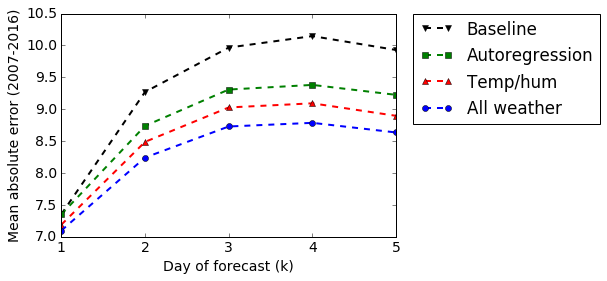

In [130]:
n_t_k = 5
t_k_arr = np.arange(n_t_k)
mets = ["MeanAbsErr"]
i = 2
for met in mets:
    base_arr = np.array(map(lambda x: mets_baseline[x][i], t_k_arr))
    mem_arr = np.array(map(lambda x: mets_mem[x][i], t_k_arr))
    temphum_arr = np.array(map(lambda x: mets_temphum[x][i], t_k_arr))
    weather_arr = np.array(map(lambda x: mets_weather[x][i], t_k_arr))
    only_weather_arr = np.array(map(lambda x: mets_only_weather[x][i], t_k_arr))
    
    plt.plot(t_k_arr+1, base_arr, "kv--", label="Baseline", linewidth=2)
    plt.plot(t_k_arr+1, mem_arr, "gs--", label="Autoregression", linewidth=2)
    plt.plot(t_k_arr+1, temphum_arr, "r^--", label="Temp/hum", linewidth=2)
    plt.plot(t_k_arr+1, weather_arr, "bo--", label="All weather", linewidth=2)
    #plt.plot(t_k_arr+1, only_weather_arr, "m--", label="Only weather")
#plt.axhline(y=mets_only_weather[i], color="m", label="Weather only")
    
    matplotlib.rcParams.update({'font.size': 14})
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("Day of forecast (k)")
    plt.xticks(t_k_arr+1)
    plt.ylabel("Mean absolute error (2007-2016)")
    plt.savefig("pics/mae.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close()

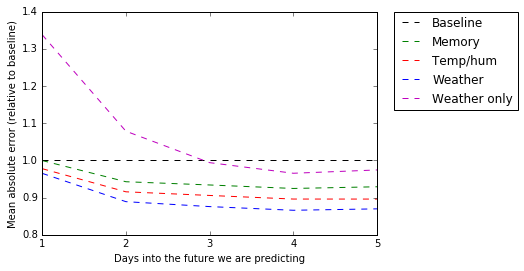

In [111]:
for met in mets:
    base_arr = np.array(map(lambda x: mets_baseline[x][i], t_k_arr))
    mem_arr = np.array(map(lambda x: mets_mem[x][i], t_k_arr))
    temphum_arr = np.array(map(lambda x: mets_temphum[x][i], t_k_arr))
    weather_arr = np.array(map(lambda x: mets_weather[x][i], t_k_arr))
    only_weather_arr = np.array(map(lambda x: mets_only_weather[x][i], t_k_arr))
    
    plt.plot(t_k_arr+1, base_arr / base_arr, "k--", label="Baseline")
    plt.plot(t_k_arr+1, mem_arr / base_arr, "g--", label="Memory")
    plt.plot(t_k_arr+1, temphum_arr / base_arr, "r--", label="Temp/hum")
    plt.plot(t_k_arr+1, weather_arr / base_arr, "b--", label="Weather")
    plt.plot(t_k_arr+1, only_weather_arr / base_arr, "m--", label="Weather only")
    
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("Days into the future we are predicting")
    plt.xticks(t_k_arr+1)
    plt.ylabel("Mean absolute error (relative to baseline)")
    plt.savefig("pics/mae_rel_only_weather.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close()

baseline_mets: [532.619594067135, 421.90594214229867, 7.353708040593286]


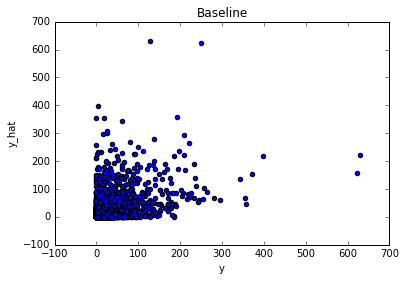

memory_mets: [387.0764410838695, 146.15132261141773, 7.3510247845208117]


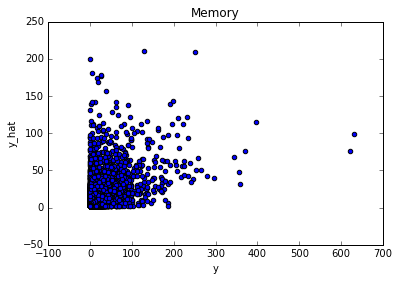

temp/hum_mets: [378.31830037149979, 139.96725135855283, 7.2031083674103398]


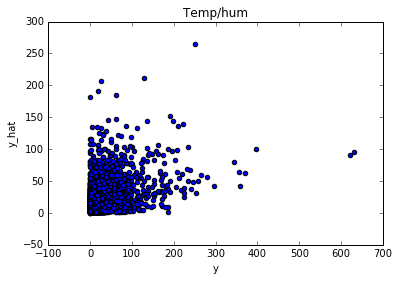

weather_mets: [370.78486767920066, 137.93669565924648, 7.1208941020082817]


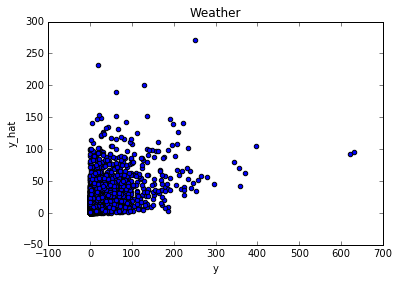

In [35]:
# Debugging, what's up with MeanAbsErr?
# First, let's train the zero-padded models on all but 2013 and see what we get for
y_t_k_base = cdf_with_stuff['n_det']
y_hat_t_k_base = np.exp(cdf_with_stuff["autoreg_%d" % 1]) - 1
my_mets = []
for met in mets:
    my_mets.append(evaluate_glm(y_t_k_base, y_hat_t_k_base, metric=met))
mets_mem_z,y_mem,y_hat_mem = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=0, weather_vars=[], zero_padding=False, return_arrs=True)
mets_temphum_z,y_temp,y_hat_temp = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=0, weather_vars=["temp","humidity"], zero_padding=False, return_arrs=True)
mets_weather_z,y_weather,y_hat_weather = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=0, weather_vars=["temp","humidity","wind","rain_del_2"], zero_padding=False, return_arrs=True)
print "baseline_mets: " + str(my_mets)
plt.scatter(y_t_k_base,y_hat_t_k_base)
plt.xlabel("y")
plt.ylabel("y_hat")
plt.title("Baseline")
plt.show()
plt.close()

print "memory_mets: " + str(mets_mem_z)
plt.scatter(y_mem,y_hat_mem)
plt.xlabel("y")
plt.ylabel("y_hat")
plt.title("Memory")
plt.show()
plt.close()

print "temp/hum_mets: " + str(mets_temphum_z)
plt.scatter(y_temp,y_hat_temp)
plt.xlabel("y")
plt.ylabel("y_hat")
plt.title("Temp/hum")
plt.show()
plt.close()

print "weather_mets: " + str(mets_weather_z)
plt.scatter(y_weather,y_hat_weather)
plt.xlabel("y")
plt.ylabel("y_hat")
plt.title("Weather")
plt.show()
plt.close()

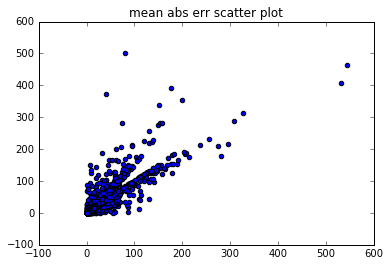

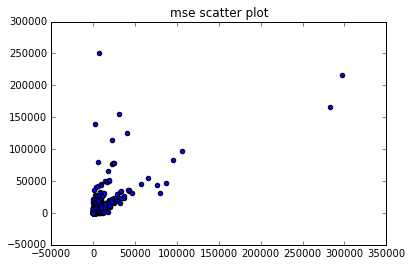

In [49]:
# OK, how is memory doing so shittily compared to the baseline wrt mean abs error?
plt.scatter(np.abs(y_hat_mem - y_mem), np.abs(y_hat_t_k_base - y_mem))
plt.title("mean abs err scatter plot")
plt.show()

plt.scatter((y_hat_mem - y_mem)**2, (y_hat_t_k_base - y_mem)**2)
plt.title("mse scatter plot")
plt.show()

In [50]:
reload(ev)
mets_mem_z,y_mem,y_hat_mem = ev.cross_validation_evaluation(cdf_with_stuff, autoreg=1, t_k=0, weather_vars=[], zero_padding=False, return_arrs=True, print_covars=True)

year 2007
	covars: Intercept    0.690812
autoreg_1    0.753391
dtype: float64
year 2008
	covars: Intercept    0.669244
autoreg_1    0.757878
dtype: float64
year 2009
	covars: Intercept    0.646703
autoreg_1    0.729245
dtype: float64
year 2010
	covars: Intercept    0.683260
autoreg_1    0.757672
dtype: float64
year 2011
	covars: Intercept    0.656997
autoreg_1    0.761385
dtype: float64
year 2012
	covars: Intercept    0.654149
autoreg_1    0.761929
dtype: float64
year 2013
	covars: Intercept    0.709180
autoreg_1    0.749224
dtype: float64
year 2014
	covars: Intercept    0.667081
autoreg_1    0.757210
dtype: float64
year 2015
	covars: Intercept    0.523442
autoreg_1    0.813679
dtype: float64
year 2016
	covars: Intercept    0.652942
autoreg_1    0.761568
dtype: float64


In [51]:
np.mean(clust_feat_df.n_det)

7.305698672911788

In [69]:
np.sum(legit_series == 1)

9212

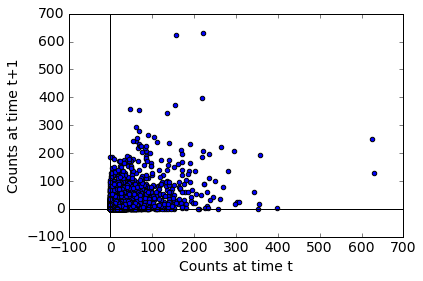

zero days: 7126 of 12810
For clusters and days with [0,1) detections (8386 such days), we have on average 1.572860 detections tomorrow
For clusters and days with [1,10) detections (2402 such days), we have on average 7.564113 detections tomorrow
For clusters and days with [10,100) detections (1859 such days), we have on average 26.551910 detections tomorrow
For clusters and days with [100,1000) detections (163 such days), we have on average 78.938650 detections tomorrow


In [121]:
#from prediction.cluster_regression import add_autoreg_and_n_det
#cdf = add_autoreg_and_n_det(clust_feat_df, 1,0)
plt.scatter(np.exp(cdf.autoreg_1)-1, cdf.n_det)
plt.axhline(y=0.0, color='k')
plt.axvline(x=0.0, color='k')
plt.xlabel("Counts at time t")
plt.ylabel("Counts at time t+1")
plt.show()

print "zero days: %d of %d" % (len(cdf[cdf.n_det == 0]), len(cdf))

cut_pts = [0, 1, 10, 100, 1000]
for i in xrange(len(cut_pts)-1):
    my_pts = cdf[(np.exp(cdf.autoreg_1)-1 >= cut_pts[i]) & (np.exp(cdf.autoreg_1)-1 < cut_pts[i+1])]
    print "For clusters and days with [%d,%d) detections (%d such days), we have on average %f detections tomorrow" % (cut_pts[i], cut_pts[i+1], len(my_pts), np.mean(my_pts.n_det))